In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

import helper
import vehicle

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [2]:
vehicle_files_dir = './data/vehicles/'
non_vehicle_files_dir = './data/non-vehicles/'

vehicle_files = helper.extract_files(vehicle_files_dir)
vehicle_images = [mpimg.imread(file) for file in vehicle_files]

non_vehicle_files = helper.extract_files(non_vehicle_files_dir)
non_vehicle_images = [mpimg.imread(file) for file in non_vehicle_files] 

print('Number of vehicle files: {}'.format(len(vehicle_files)))
print('Number of non-vehicle files: {}'.format(len(non_vehicle_files)))

Number of vehicle files: 8792
Number of non-vehicle files: 8968


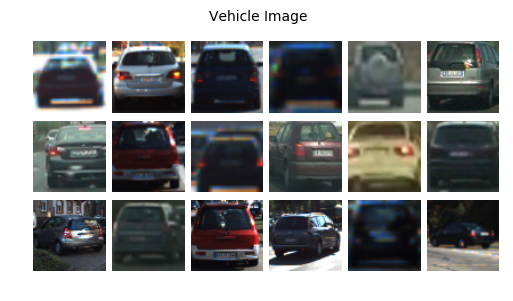

In [3]:
helper.display_random_images(vehicle_files, num_of_images=18, main_title='Vehicle Image')

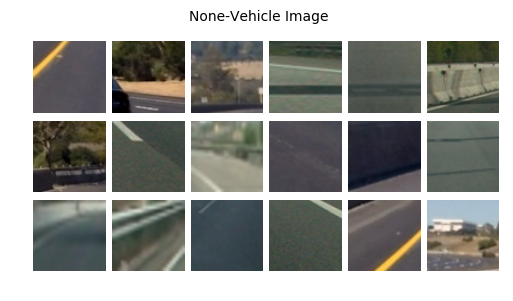

In [4]:
helper.display_random_images(non_vehicle_files, num_of_images=18, main_title='None-Vehicle Image')

(1764,)


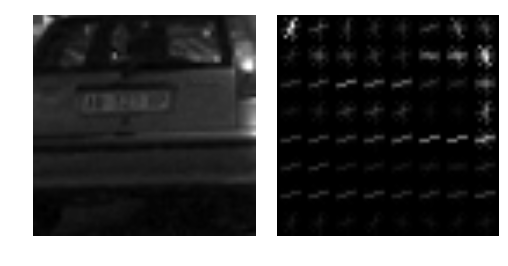

In [5]:
image = mpimg.imread(vehicle_files[0])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


orient = 9
pix_per_cell = 8
cell_per_block = 2

features, hog_image = vehicle.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

print(features.shape)
# Plot the examples
a = []
b = []
a.append(hog_image)
b.append(gray)
helper.visualize_hog_features(a, b, color_map='gray')

In [6]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [200, None] # Min and max in y to search in slide_window()

feature, _ = vehicle.single_img_features(image, color_space, spatial_size, hist_bins, orient, pix_per_cell, 
                   cell_per_block, hog_channel, spatial_feat, hist_feat, hog_feat, vis=True)

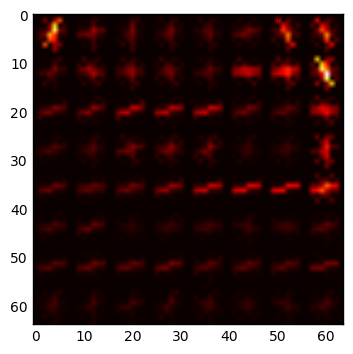

In [7]:
plt.imshow(_, cmap='hot')
plt.show()

In [8]:
color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = 'ALL'  # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32)  # Spatial binning dimensions
hist_bins = 32  # Number of histogram bins
spatial_feat = True  # Spatial features on or off
hist_feat = True  # Histogram features on or off
hog_feat = True  # HOG features on or off

vehical_features = vehicle.extract_features(vehicle_images, color_space, orient, spatial_size, hist_bins,
                                    pix_per_cell, cell_per_block, spatial_feat, hist_feat, hog_feat,
                                    hog_channel)
print(vehical_features.shape)

non_vehical_features = vehicle.extract_features(non_vehicle_images, color_space, orient, spatial_size,
                                        hist_bins, pix_per_cell, cell_per_block, spatial_feat,
                                        hist_feat, hog_feat, hog_channel)
print(non_vehical_features.shape)

features = np.vstack((vehical_features, non_vehical_features)).astype(np.float64)
print(features.shape)

scaler = StandardScaler().fit(features)

X_features = scaler.transform(features)

y_features = np.hstack((np.ones(len(vehicle_images)), np.zeros(len(non_vehicle_images))))

X_train, X_test, y_train, y_test = train_test_split(X_features, y_features,
                                                        test_size=0.05, random_state=1024)
svc = LinearSVC().fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)

print('testing :{}'.format(accuracy))
print('training :{}'.format(svc.score(X_train, y_train)))

(8792, 8460)
(8968, 8460)
(17760, 8460)
testing :0.9898648648648649
training :1.0


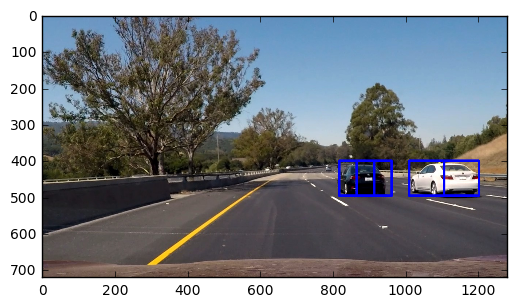

In [47]:
img_path = './test_images/test6.jpg'
image = mpimg.imread(img_path)
draw_image = np.copy(image)
image = image.astype(np.float32)/255.0

y_start_stop = [400,650]  # Min and max in y to search in slide_window()

windows = vehicle.slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop,
                                xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = vehicle.search_windows(image, windows, svc, scaler, color_space=color_space,
                             spatial_size=spatial_size, hist_bins=hist_bins,
                             orient=orient, pix_per_cell=pix_per_cell,
                             cell_per_block=cell_per_block,
                             hog_channel=hog_channel, spatial_feat=spatial_feat,
                             hist_feat=hist_feat, hog_feat=hog_feat)

window_img = helper.draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)

plt.imshow(window_img)
plt.show()